## IPL Stats

import statements


In [1]:
#Title : IPL Stats 
#Author : Ashish Kumar Jayant
#Date : March 23, 2017




import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Reading csv file

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

## Bat first or Bowl First ?

In [3]:
matches['winner_inning'] = matches['win_by_runs'].apply(lambda x: 1 if x>0 else 2)

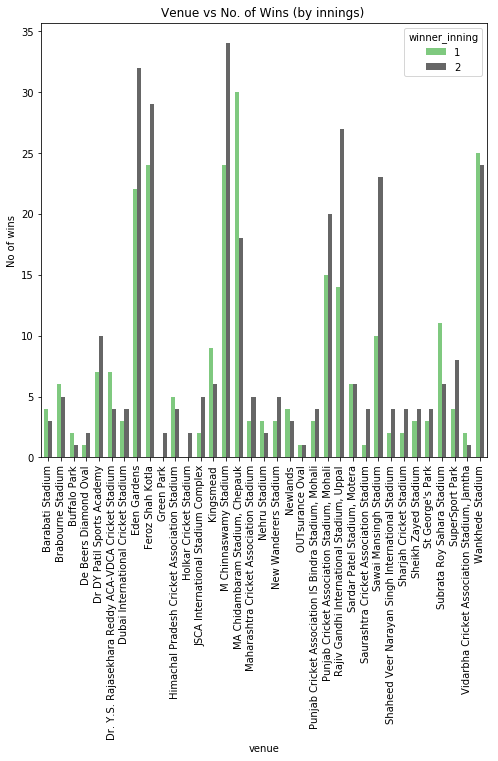

In [4]:
s1=matches.groupby(['venue'])['winner_inning'].value_counts().unstack().plot(kind = 'bar',
                                                                              width = 0.65, 
                                                                              figsize = (8,8),
                                                                              colormap = cm.Accent)

plt.title('Venue vs No. of Wins (by innings) ')
plt.ylabel('No of wins')
plt.show()

## Last two seasons top performers

In [5]:
# Taking out dataframe of last two seasons

In [6]:
matches_last_2 = matches.loc[(matches.id >= 462) & (matches.id <= 577)] 

In [7]:
deliveries_last_2 = deliveries.loc[(deliveries.id >= 462) & (deliveries.id <= 577)]

In [8]:
bat = deliveries_last_2.groupby(['batsman'])['total_runs'].sum().sort_values(ascending = False).copy()

In [9]:
bat = bat.head(10)

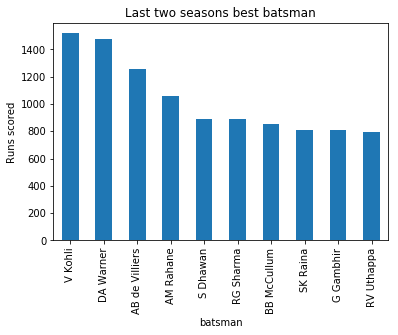

In [10]:
bat.plot(kind = 'bar')
plt.title('Last two seasons best batsman')
plt.ylabel('Runs scored')
plt.show()

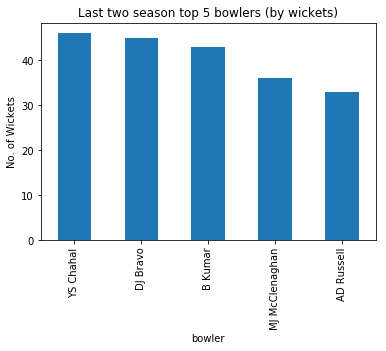

In [11]:
wickets = deliveries_last_2.groupby(['bowler'])['player_dismissed'].count()
wickets.sort_values(ascending = False, inplace = True)
wickets = wickets.head(5)
wickets.plot(kind = 'bar')
plt.title('Last two season top 5 bowlers (by wickets)')
plt.ylabel('No. of Wickets')
plt.show()

most economic bowlers in last two seasons

In [12]:
#Eliminating extra deliveries from no. of balls bowled

In [13]:
deliveries_last_2.is_copy = False
deliveries_last_2['bowl_flag'] = (deliveries_last_2['wide_runs'] == 0) & (deliveries_last_2['noball_runs']==0)  

In [14]:
deliveries_last_2['bowl_flag'] = deliveries_last_2['bowl_flag'].apply(lambda x:1 if x==True else 0)

In [15]:
#Totals runs given by each bowler

In [16]:
runs_given = deliveries_last_2.groupby(['bowler'])['total_runs'].sum()

In [17]:
#Total overs bowled and keeping only bowlers with  overs bowled > 34

In [21]:
overs_bowled = deliveries_last_2.groupby(['bowler'])['bowl_flag'].sum()/6
overs_bowled = overs_bowled.sort_values(ascending = False).head(50)

In [19]:
#Calculating economy rate

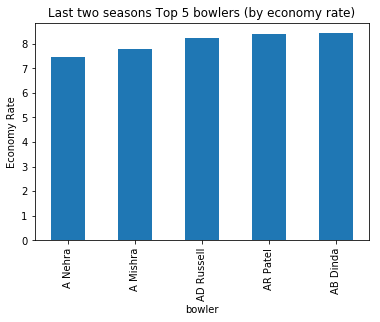

In [22]:
Economy = runs_given/overs_bowled
Economy = Economy.dropna().head(5)
Economy.sort_values(inplace = True)
Economy.plot(kind = 'bar', width = 0.5)
plt.ylabel('Economy Rate')
plt.title('Last two seasons Top 5 bowlers (by economy rate)')
plt.show()